In [1]:
import numpy as np
import matplotlib.pyplot as plt
from zeta import couple, quality_check

N = 17.46


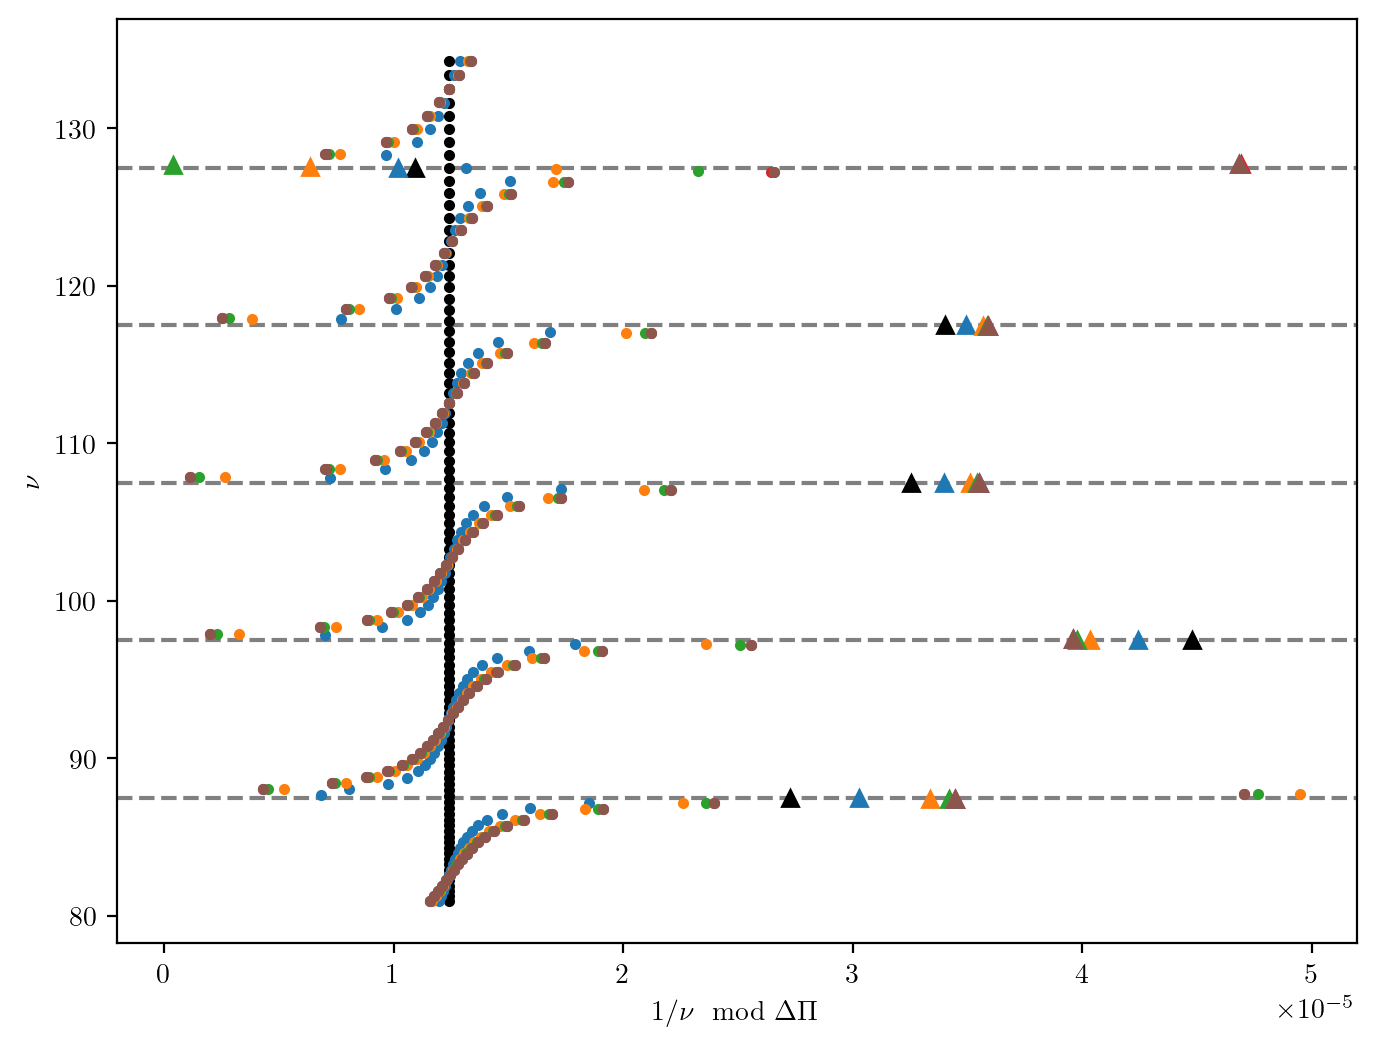

True

In [2]:
q = .1
Δν = 10
ΔΠ = 49.571 / 1e6
νp = Δν * (np.arange(8, 13) + 1/2 + 1/4)
νg = 1 / (ΔΠ * (np.arange(150, 250) + 1/4))[::-1]

print(f"N = {Δν / (np.median(νp)**2 * ΔΠ):.2f}")

for _ in νp:
    plt.axhline(_, ls='dashed', c='gray')

plt.plot(1/νp % ΔΠ, νp, '^', c='black')
plt.plot(1/νg % ΔΠ, νg, '.', c='black')

for i, maxiter in enumerate([1, 3, 5, 10, 50, 100]):
    νmp, νmg = couple(νp, νg, q, q, maxiter=maxiter)

    plt.plot(1/νmp % ΔΠ, νmp, '^', c=f"C{i}")
    plt.plot(1/νmg % ΔΠ, νmg, '.', c=f"C{i}")

plt.xlabel(r"$1/\nu \mod \Delta\Pi$")
plt.ylabel(r"$\nu$")
plt.show()
quality_check(νp, νg, νmp, νmg)